In [14]:
from google.colab import files
files.upload()

Saving Data_ergonomics.xlsx to Data_ergonomics (2).xlsx


{'Data_ergonomics (2).xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00J\xe2I\x12{\x01\x00\x00T\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [15]:
import pandas as pd
# Load the data
df = pd.read_excel('/content/Data_ergonomics (2).xlsx')

In [16]:
df

,Number,Gender,Age,Height,Weight,Hand Dominance,Grip strength,Physical Activity,Smoking habits,BMI
0,1,1,19,1.740,97.75,1,39.333333,2,1,32.286299
1,2,1,18,1.743,92.80,1,40.133333,1,1,30.545919
2,3,1,20,1.733,91.20,1,26.725000,3,3,30.366708
3,4,1,19,1.695,62.55,1,30.833333,3,1,21.771478
4,5,1,18,1.695,78.65,1,45.633333,1,1,27.375327
...,...,...,...,...,...,...,...,...,...,...
135,136,2,20,1.624,85.95,1,28.500000,3,1,32.589210
136,137,1,19,1.800,66.80,1,39.066667,3,1,20.617284
137,138,1,20,1.853,93.30,1,46.866667,1,1,27.172576
138,139,1,23,1.710,65.85,1,40.866667,1,2,22.519750


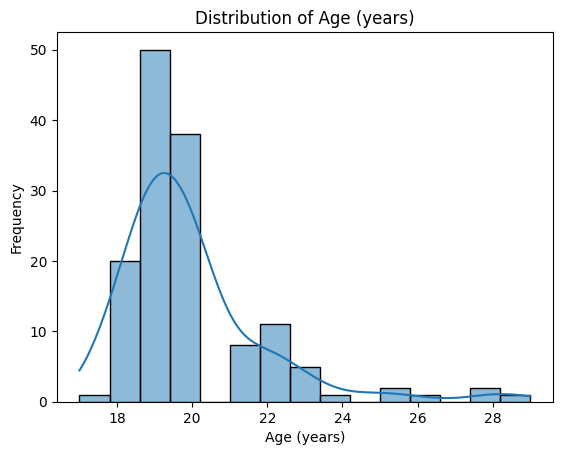

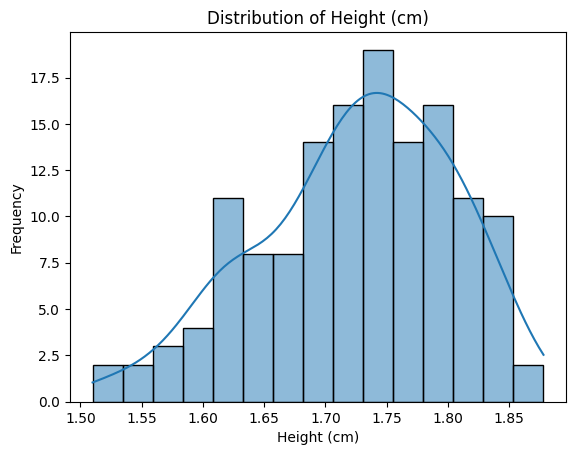

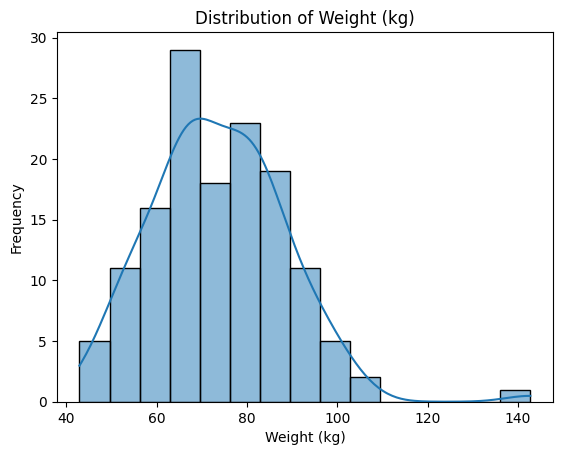

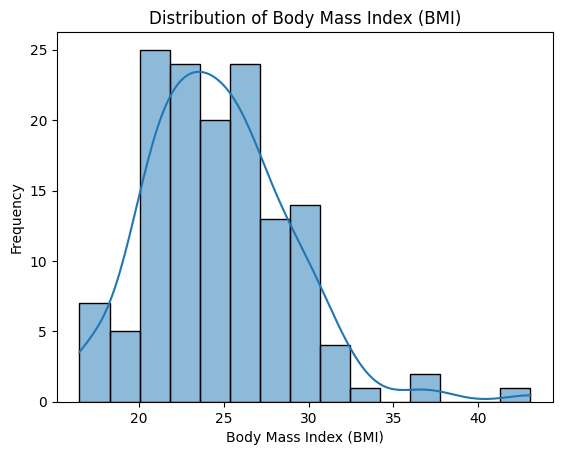

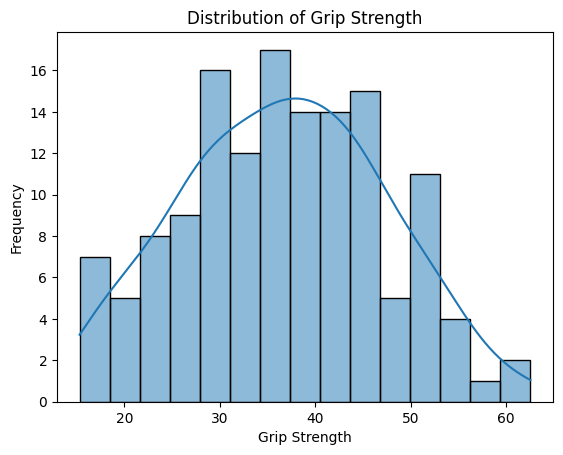

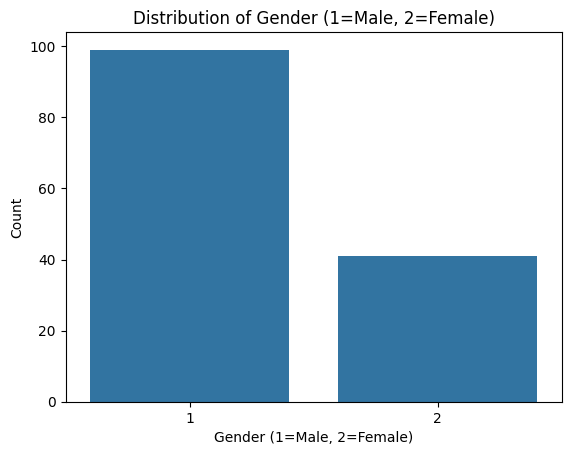

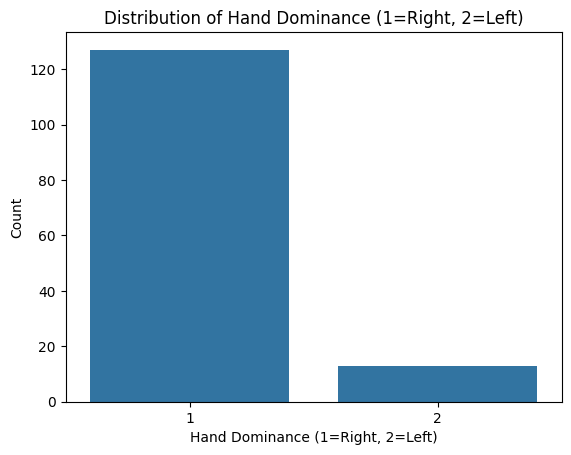

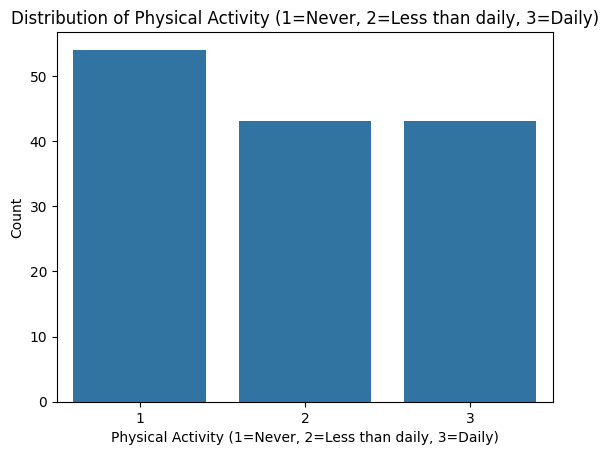

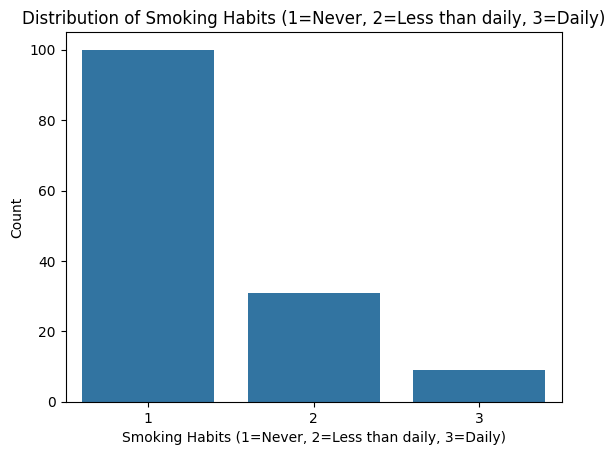

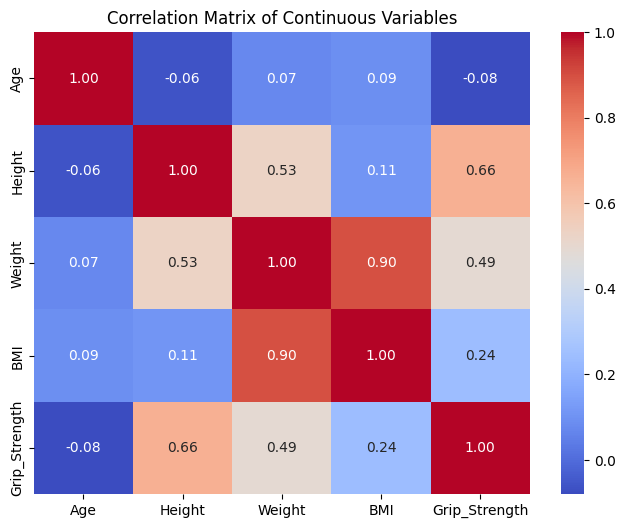

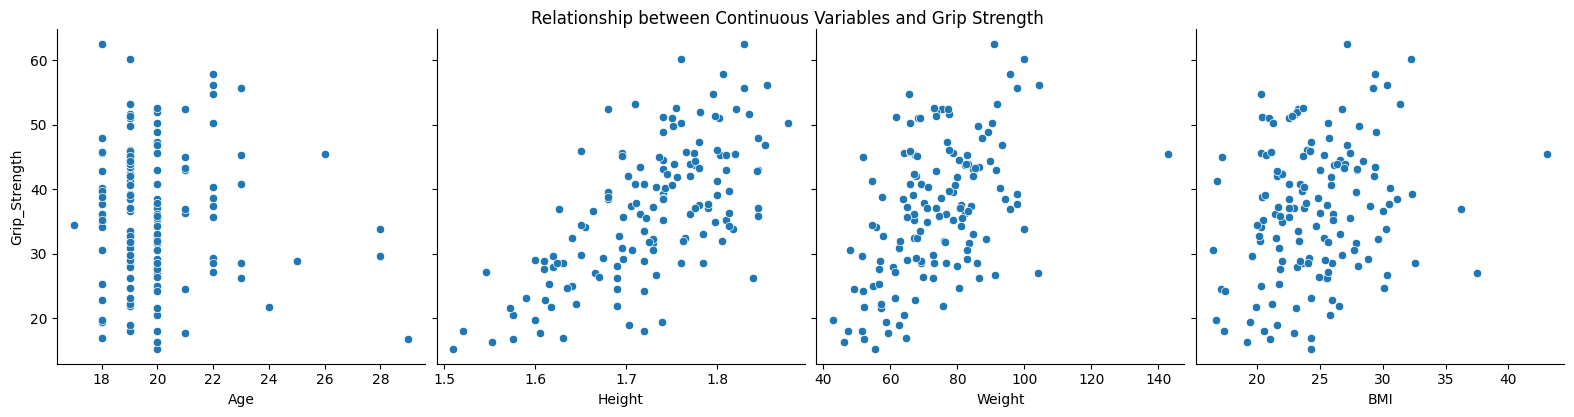

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename columns for easier reference
df.rename(columns={
    'Number': 'ID',
    'Gender': 'Gender',
    'Age': 'Age',
    'Height': 'Height',
    'Weight': 'Weight',
    'Hand Dominance': 'Hand_Dominance',
    'Grip strength': 'Grip_Strength',
    'Physical Activity': 'Physical_Activity',
    'Smoking habits': 'Smoking_Habits',
    'BMI': 'BMI'
}, inplace=True)

# Plot distributions of continuous variables
numerical_features = {
    'Age': 'Age (years)',
    'Height': 'Height (cm)',
    'Weight': 'Weight (kg)',
    'BMI': 'Body Mass Index (BMI)',
    'Grip_Strength': 'Grip Strength'
}

for col, label in numerical_features.items():
    plt.figure()
    sns.histplot(df[col], bins=15, kde=True)
    plt.title(f'Distribution of {label}')
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.show()

# Plot counts for categorical/ordinal variables
categorical_features = {
    'Gender': 'Gender (1=Male, 2=Female)',
    'Hand_Dominance': 'Hand Dominance (1=Right, 2=Left)',
    'Physical_Activity': 'Physical Activity (1=Never, 2=Less than daily, 3=Daily)',
    'Smoking_Habits': 'Smoking Habits (1=Never, 2=Less than daily, 3=Daily)'
}

for col, label in categorical_features.items():
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {label}')
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.show()

# Correlation heatmap for continuous variables
plt.figure(figsize=(8,6))
corr_matrix = df[['Age', 'Height', 'Weight', 'BMI', 'Grip_Strength']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

# Pairplot: continuous variables vs Grip Strength
sns.pairplot(df, x_vars=['Age', 'Height', 'Weight', 'BMI'], y_vars='Grip_Strength', height=4, kind='scatter')
plt.suptitle('Relationship between Continuous Variables and Grip Strength', y=1.02)
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target
X = df.drop(columns=['ID', 'Grip_Strength'])
y = df['Grip_Strength']

# Separate numeric and categorical columns
numeric_features = ['Age', 'Height', 'Weight', 'BMI']
categorical_features = ['Gender', 'Hand_Dominance', 'Physical_Activity', 'Smoking_Habits']

# Preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # Avoid dummy variable trap

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Explained variance ratio of 2 components: 0.79


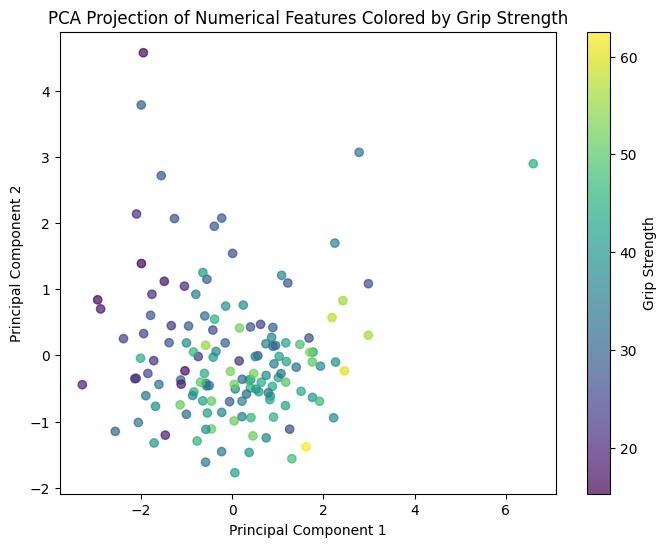

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# We apply PCA only to numerical features, after scaling
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[numeric_features])

# Apply PCA, reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_num_scaled)

print(f"Explained variance ratio of 2 components: {pca.explained_variance_ratio_.sum():.2f}")

# Plot PCA result
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Grip_Strength'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Grip Strength')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Numerical Features Colored by Grip Strength')
plt.show()


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
import xgboost as xgb

# Random Forest Regressor
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])
rf_model.fit(X_train, y_train)
preds_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, preds_rf)
r2_rf = r2_score(y_test, preds_rf)

# K-Nearest Neighbors Regressor
knn_model = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])
knn_model.fit(X_train, y_train)
preds_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, preds_knn)
r2_knn = r2_score(y_test, preds_knn)

# Elastic Net Regression
elasticnet_model = Pipeline([
    ('preprocessor', preprocessor),
    ('elasticnet', ElasticNet(random_state=42))
])
elasticnet_model.fit(X_train, y_train)
preds_en = elasticnet_model.predict(X_test)
mse_en = mean_squared_error(y_test, preds_en)
r2_en = r2_score(y_test, preds_en)

# XGBoost Regressor
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBRegressor(random_state=42, verbosity=0))
])
xgb_model.fit(X_train, y_train)
preds_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, preds_xgb)
r2_xgb = r2_score(y_test, preds_xgb)

import pandas as pd

# Create a results dictionary
results = {
    'Model': ['Random Forest', 'K-Nearest Neighbors', 'ElasticNet', 'XGBoost'],
    'MSE': [mse_rf, mse_knn, mse_en, mse_xgb],
    'R^2': [r2_rf, r2_knn, r2_en, r2_xgb]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Sort by R^2 score (descending) or MSE (ascending), depending on your goal
results_df_sorted = results_df.sort_values(by='R^2', ascending=False).reset_index(drop=True)

# Display results
print("\n Model Performance Summary:")
print(results_df_sorted)



 Model Performance Summary:
                 Model        MSE       R^2
0           ElasticNet  55.344327  0.497437
1  K-Nearest Neighbors  59.246970  0.461998
2        Random Forest  60.705831  0.448751
3              XGBoost  68.125596  0.381374


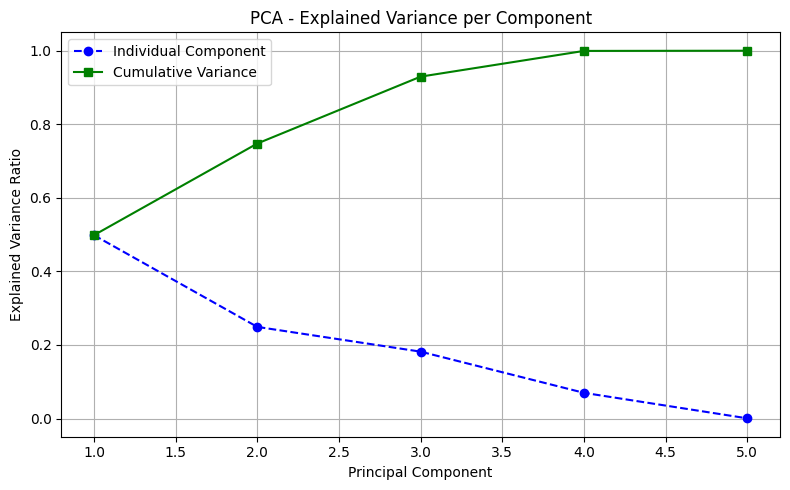

In [31]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Age', 'Height', 'Weight', 'Grip_Strength', 'BMI']
X = df[features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_,
         marker='o', linestyle='--', color='b', label='Individual Component')
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(),
         marker='s', linestyle='-', color='g', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance per Component')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Features and target
X = df.drop(columns=['Grip_Strength', 'ID'])  # drop target and ID
y = df['Grip_Strength']

# Define numerical and categorical features
numeric_features = ['Age', 'Height', 'Weight', 'BMI']
categorical_features = ['Gender', 'Hand_Dominance', 'Physical_Activity', 'Smoking_Habits']

# Preprocessing for numeric data: scale + PCA
numeric_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=4))
])

# Preprocessing for categorical data: One-hot encode
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Combine preprocessing
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(random_state=42),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': xgb.XGBRegressor(random_state=42, verbosity=0)
}

results = []

for name, model in models.items():
    # Create pipeline: preprocessing + model
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({'Model': name, 'MSE': mse, 'R2': r2})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
print(results_df)


                 Model        MSE        R2
0    Linear Regression  45.379259  0.587926
1           ElasticNet  54.498159  0.505120
5  K-Nearest Neighbors  59.246970  0.461998
2                  SVR  62.562629  0.431890
4    Gradient Boosting  69.421053  0.369611
3        Random Forest  69.558879  0.368359
6              XGBoost  98.761231  0.103182


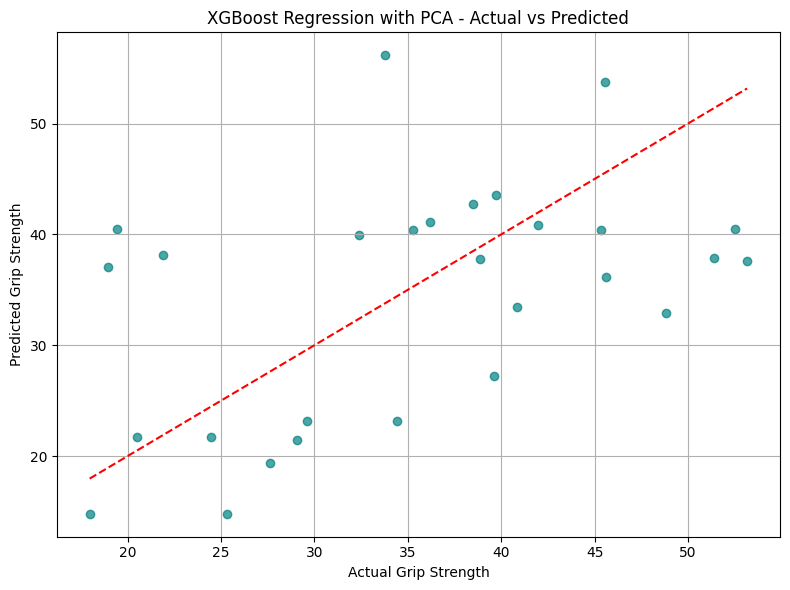

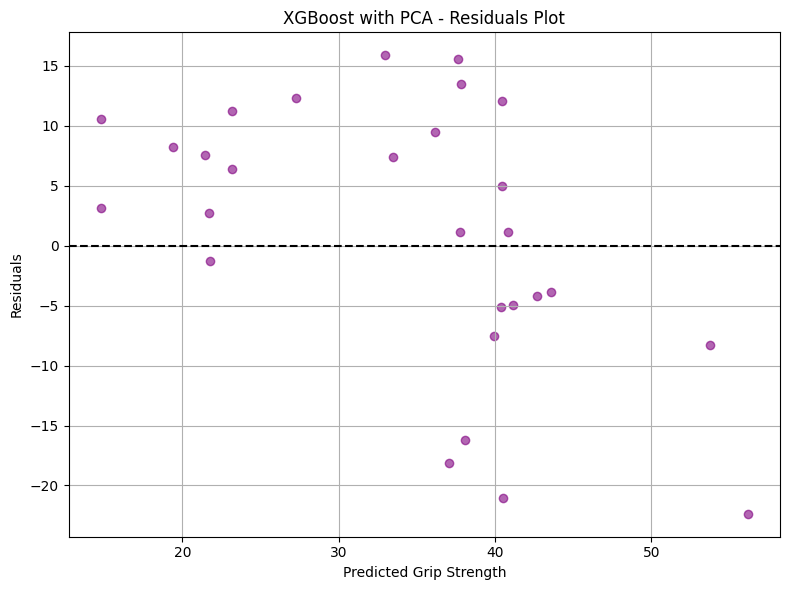

In [38]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df[['Age', 'Height', 'Weight', 'BMI']]
y = df['Grip_Strength']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=4)),  # adjust depending on your explained variance
    ('xgb', XGBRegressor(n_estimators=100, random_state=42))
])

# Fit the model
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Grip Strength')
plt.ylabel('Predicted Grip Strength')
plt.title('XGBoost Regression with PCA - Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

import numpy as np

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Predicted Grip Strength')
plt.ylabel('Residuals')
plt.title('XGBoost with PCA - Residuals Plot')
plt.grid(True)
plt.tight_layout()
plt.show()
